## Name :  Samrat Halder
### The Sparks Foundation : Task 6 Decision Tree Algoritm

### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [73]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Pre processing of Data

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Dividing the dataset into Independent and dependent features¶

In [76]:
#Independent features
x = df.iloc[: ,[1,2,3,4]].values


In [77]:
#Dependent features
y = df.iloc[: ,-1].values

### Training the model

In [78]:
#Spliting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( random_state = 42)

In [79]:
model.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
#making prediction
y_pred = model.predict(x_test)

In [81]:
# Checking accuracy score
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
cm = confusion_matrix(y_pred , y_test)

In [82]:
#Accuracy score for differnt values of max depth
accuracy = []
for depth in list(range(1,6)):
    clf = DecisionTreeClassifier(max_depth = depth , random_state = 42)
    clf.fit(x_train , y_train)
    score = clf.score(x_test , y_test)
    accuracy.append(score)

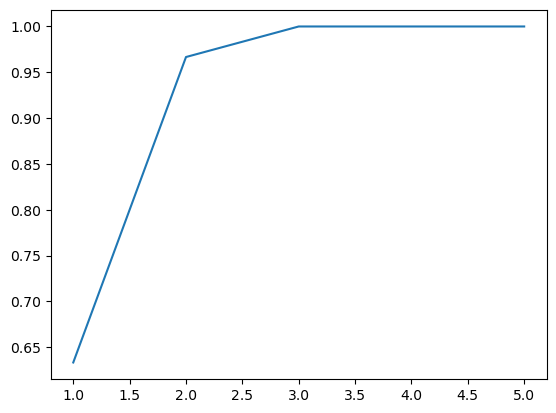

In [83]:
#Plotting accuracy score depth wise
plt.plot(list(range(1,6)) , accuracy);

In [84]:
accu = accuracy_score(y_pred , y_test)
accu

1.0

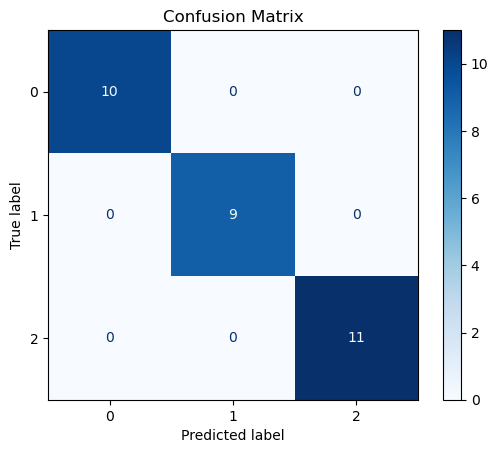

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### We can visualize the Decision Tree learned from the data

In [86]:
feature_names = ["SepalLengthCm" ,"SepalWidthCm" , "PetalLengthCm" ,"PetalWidthCm"]

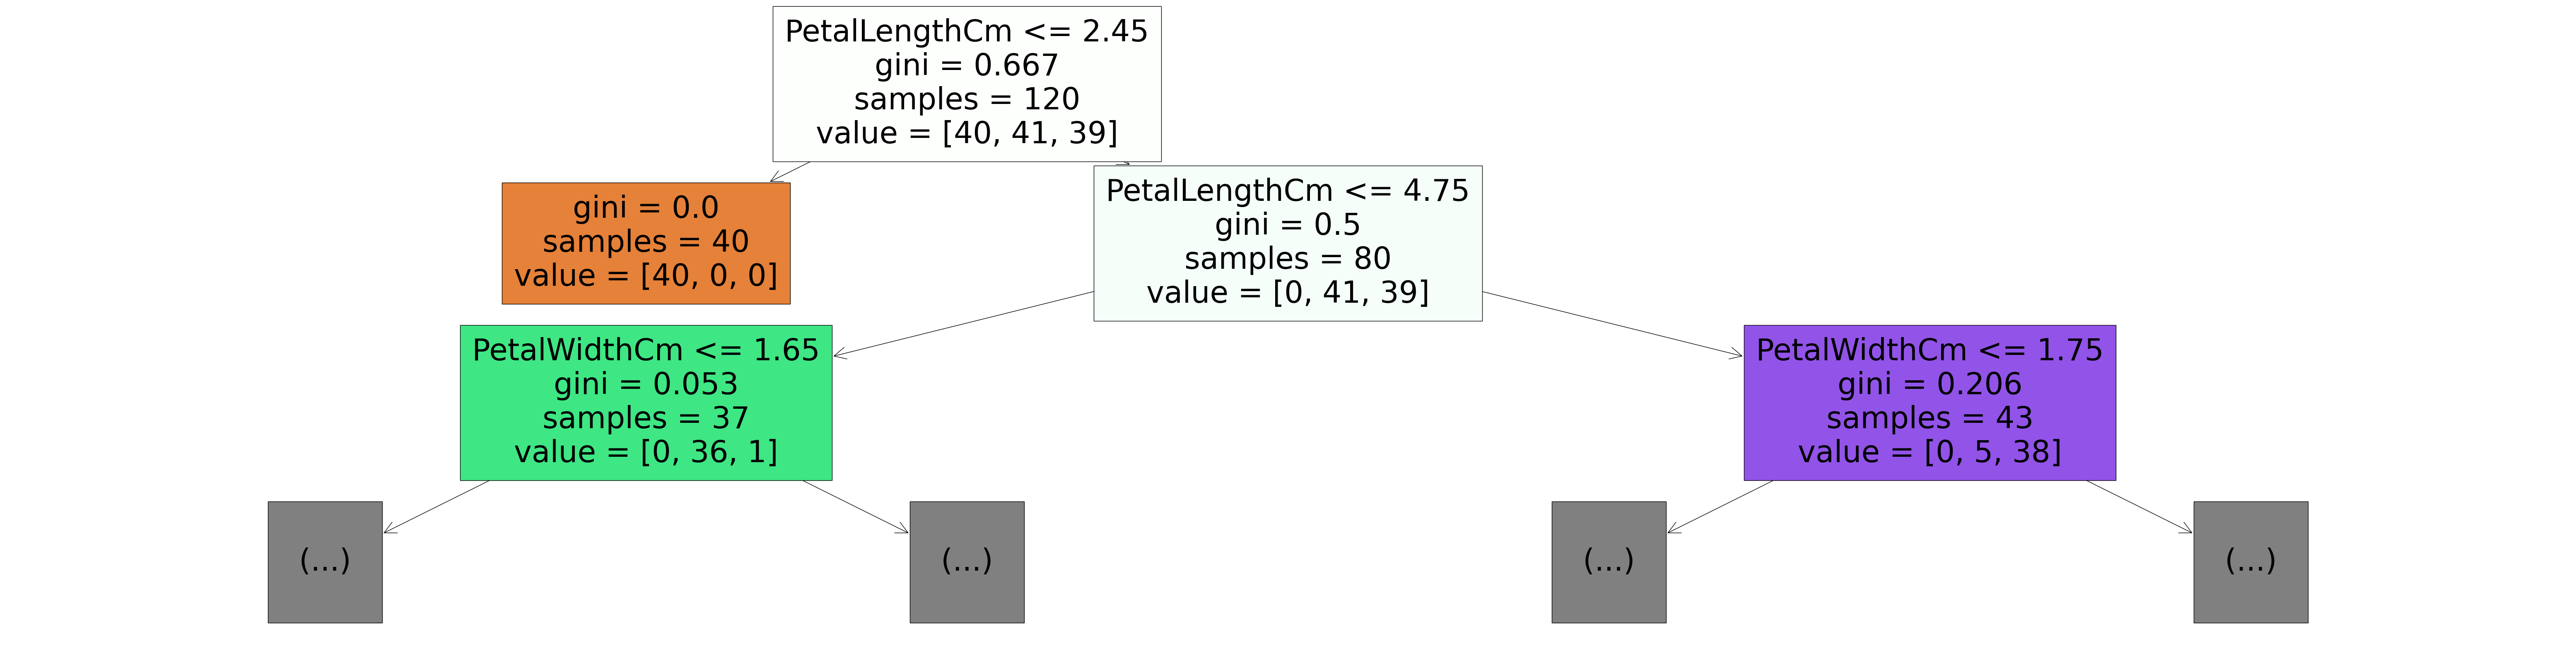

In [87]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize = (80,20))
plot_tree(model , feature_names=feature_names, max_depth = 2 , filled = True );

In [88]:
print(classification_report(y_test , y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Conclusion

#### After fitting the model , our model has 97% accuracy
#### From accuracy score vs depth plot we can say optimal depth for the model is 3 